In [1]:
import yfinance as yf
from datetime import datetime, timedelta

# Define the ticker symbol and date range
ticker = "AAPL"
end_date = datetime.today()
start_date = end_date - timedelta(days=30)

# Fetch the data
apple_data = yf.download(ticker, start=start_date.strftime("%Y-%m-%d"), end=end_date.strftime("%Y-%m-%d"))

# Display the data
print(apple_data)


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2025-01-07  242.210007  245.550003  241.350006  242.979996   40856000
2025-01-08  242.699997  243.710007  240.050003  241.919998   37628900
2025-01-10  236.850006  240.160004  233.000000  240.009995   61710900
2025-01-13  234.399994  234.669998  229.720001  233.529999   49630700
2025-01-14  233.279999  236.119995  232.470001  234.750000   39435300
2025-01-15  237.869995  238.960007  234.429993  234.639999   39832000
2025-01-16  228.259995  238.009995  228.029999  237.350006   71759100
2025-01-17  229.979996  232.289993  228.479996  232.119995   68488300
2025-01-21  222.639999  224.419998  219.380005  224.000000   98070400
2025-01-22  223.830002  224.119995  219.789993  219.789993   64126500
2025-01-23  223.660004  227.029999  222.300003  224.740005   60234800
2025-01-24  222.7799

In [2]:
ticker = "AAPL"
interval = "1m"  # Smallest interval

# Fetch data for the last 7 days
apple_data = yf.download(tickers=ticker, period="7d", interval=interval)

# Display the first few rows of data
print(apple_data.head())

[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Datetime                                                                    
2025-01-29 14:30:00+00:00  235.000000  235.369904  234.009995  234.149994   
2025-01-29 14:31:00+00:00  235.154999  235.350006  234.520004  234.979996   
2025-01-29 14:32:00+00:00  235.042007  235.600006  234.720001  235.154999   
2025-01-29 14:33:00+00:00  235.375000  235.470001  234.940002  235.009995   
2025-01-29 14:34:00+00:00  235.000000  235.419998  234.875000  235.360001   

Price                       Volume  
Ticker                        AAPL  
Datetime                            
2025-01-29 14:30:00+00:00  3768934  
2025-01-29 14:31:00+00:00   292500  
2025-01-29 14:32:00+00:00   308834  
2025-01-29 14:33:00+00:00   206882  
2025-01-29 14:34:00+00:00   309659  


[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood opt

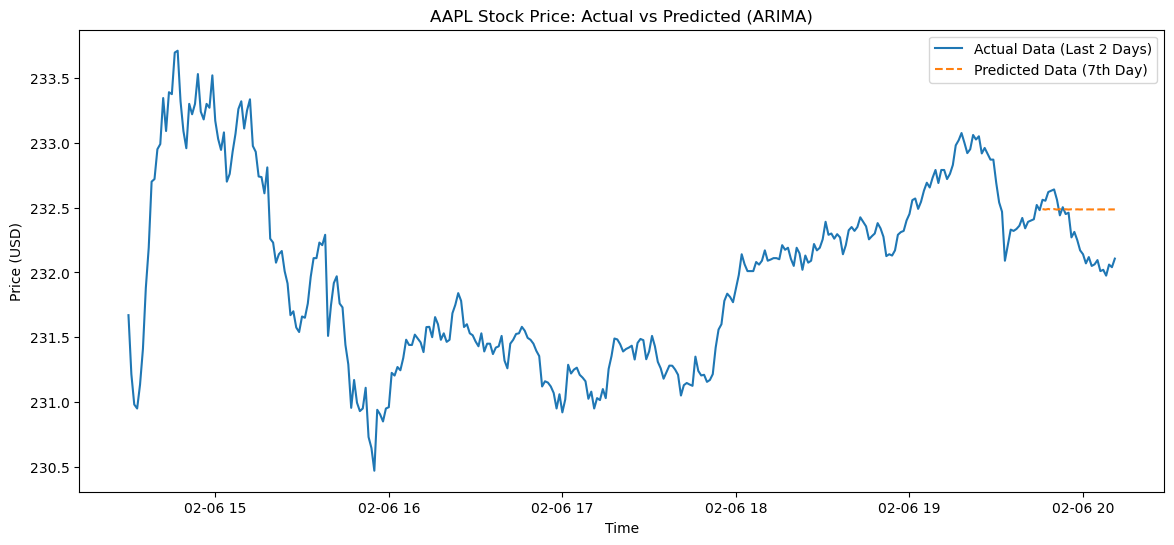

[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary st

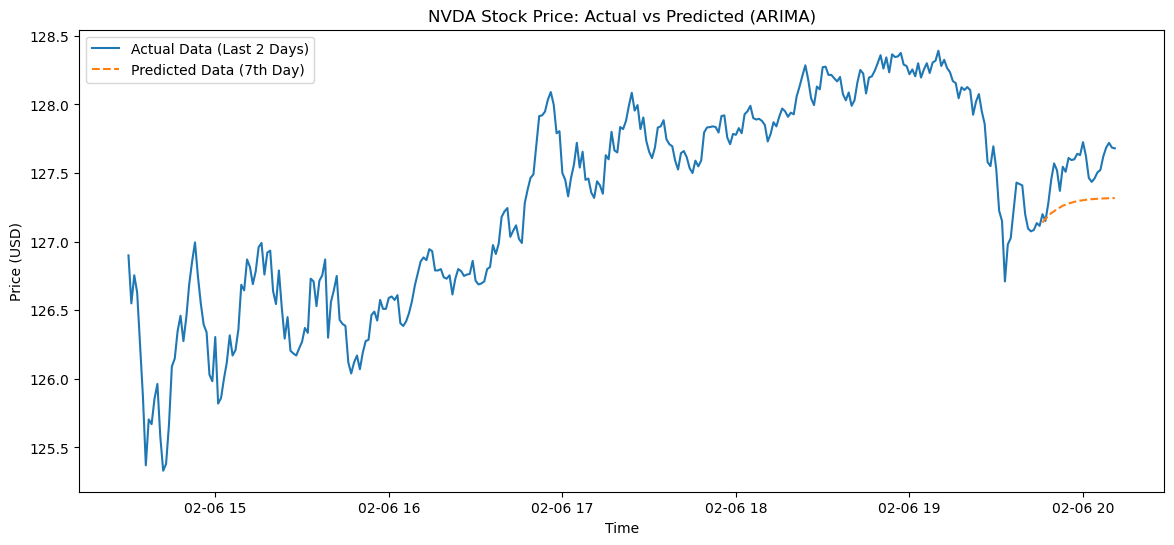

[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood opt

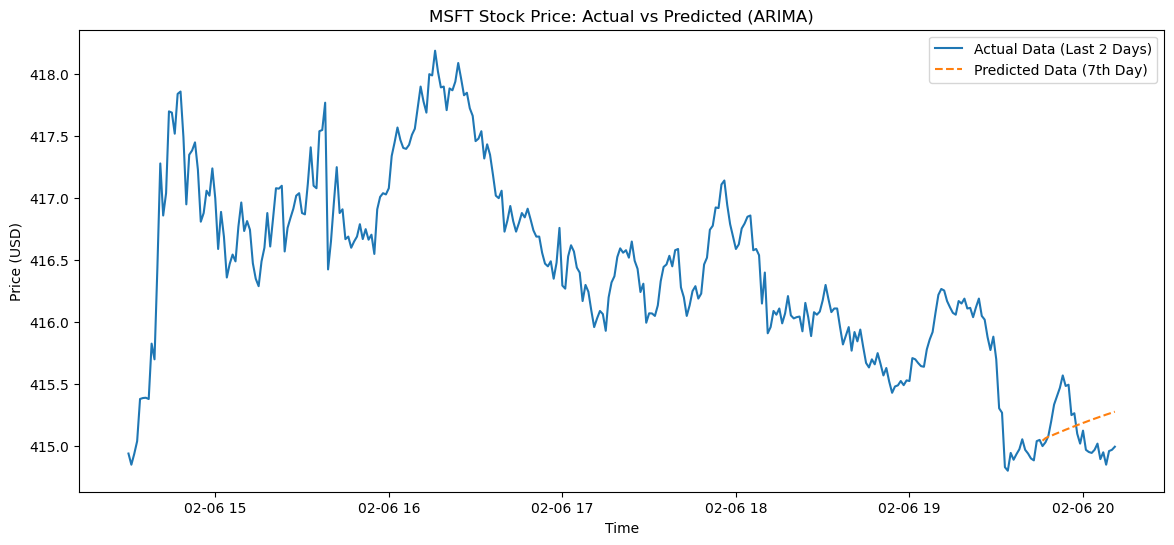

[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood opt

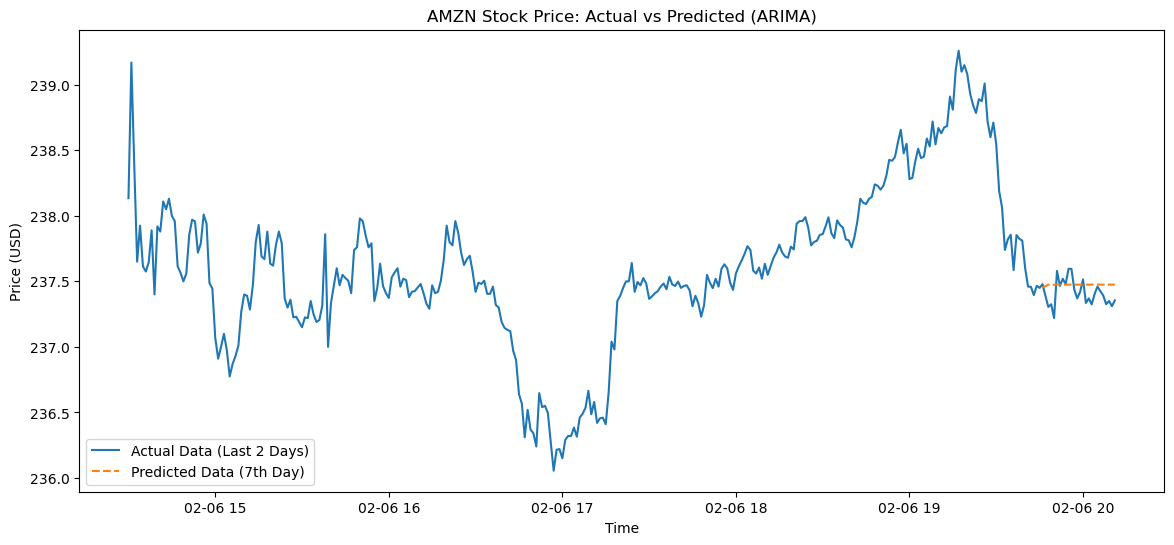

[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary st

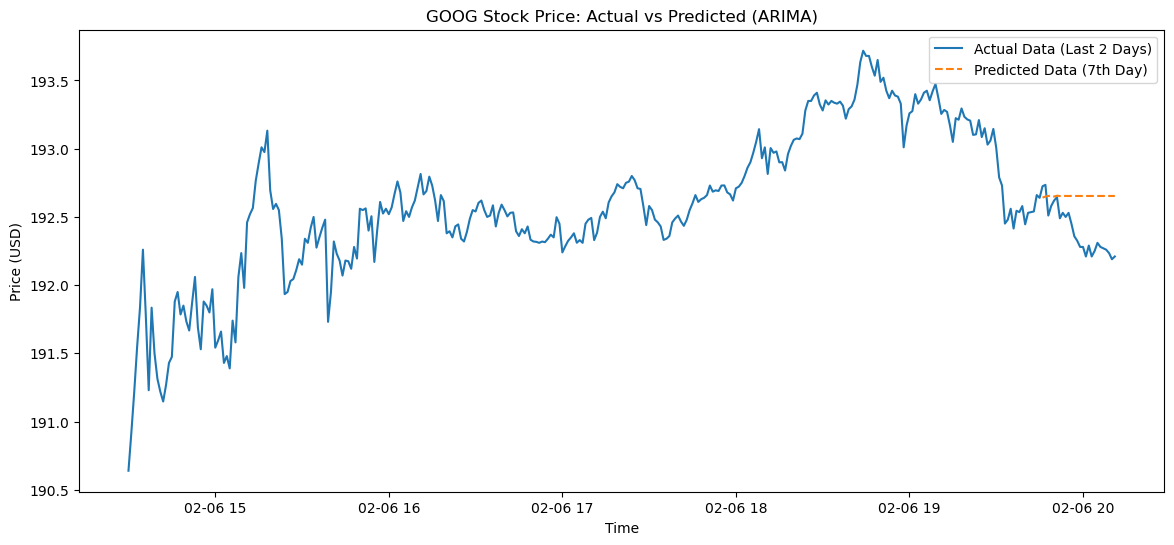

[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index i

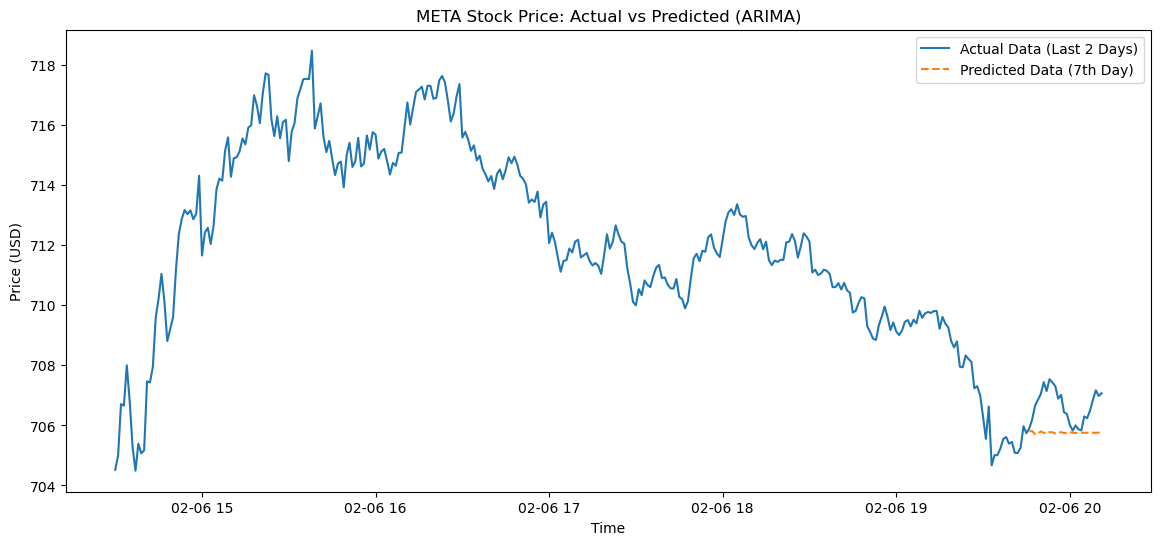

[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary st

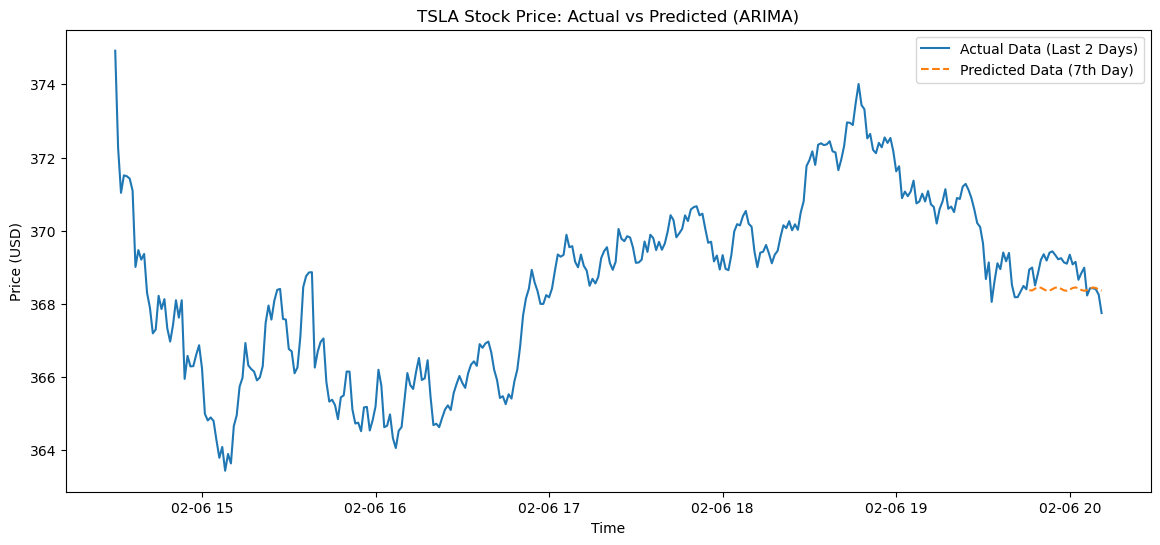

[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index i

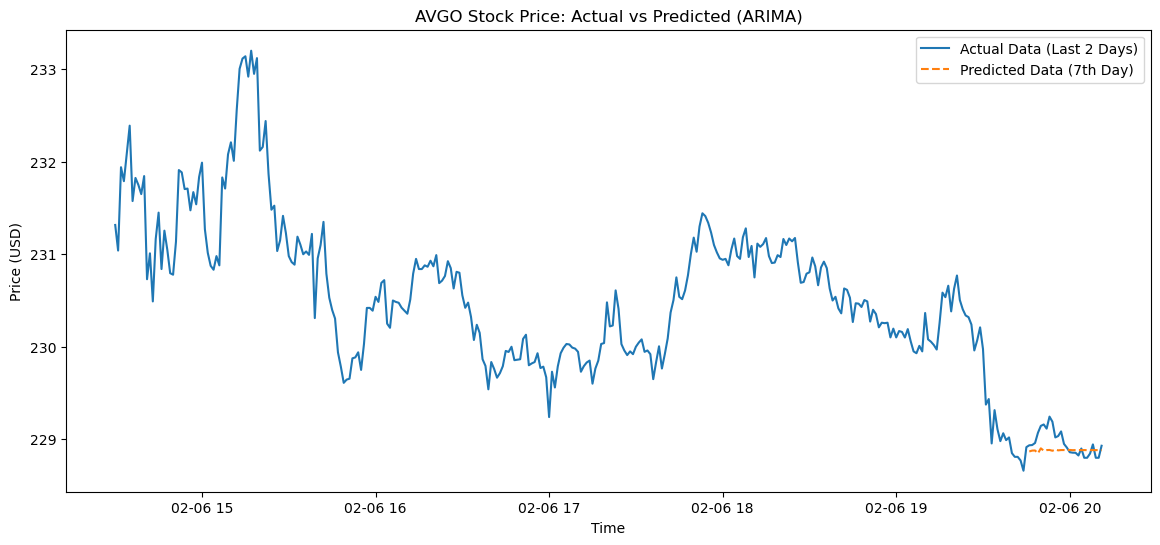

[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary st

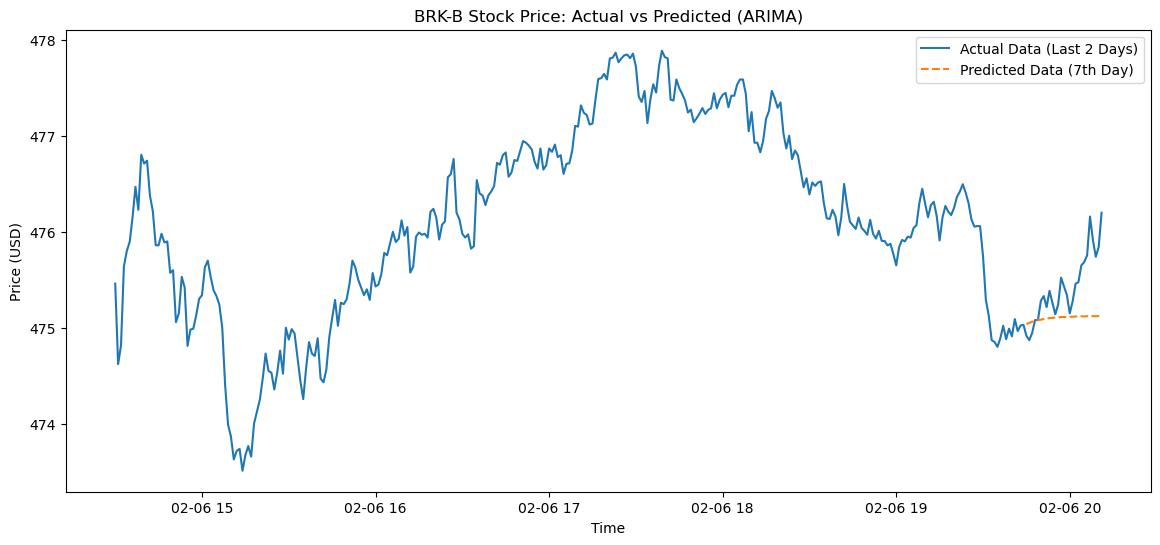

[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary st

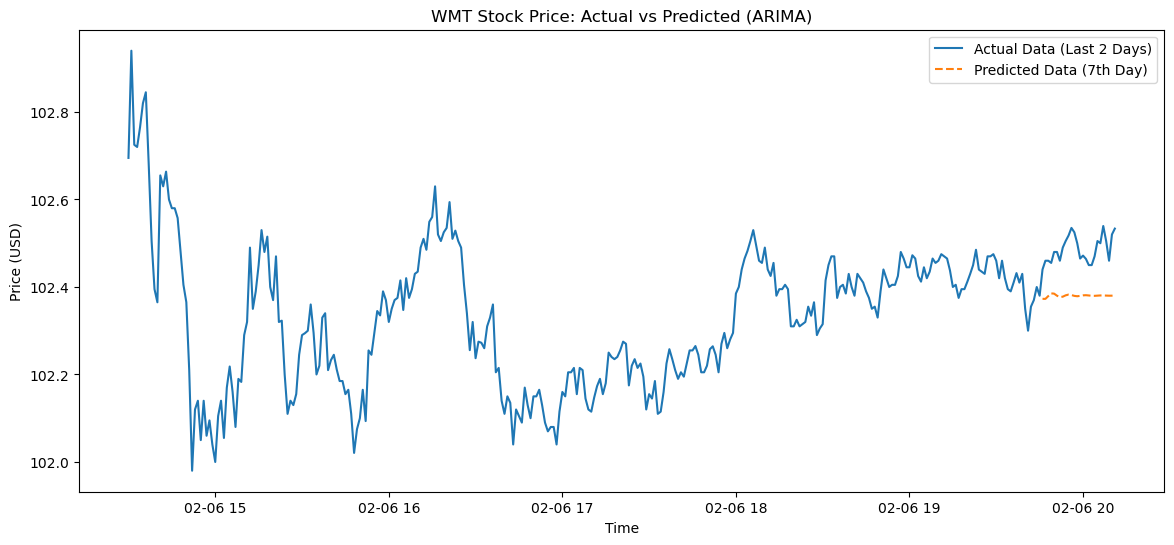

In [26]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fetch Apple's 1-minute data over 7 days
ticker = ["AAPL", "NVDA", "MSFT", "AMZN", "GOOG", "META", "TSLA", "AVGO", "BRK-B", "WMT"]
interval = "1m"
period = "1d"

def predict_stock(ticker):
    data = yf.download(tickers=ticker, period=period, interval=interval)

    # Extract closing prices
    closing_prices = data["Close"].dropna()

    train = closing_prices[:-26]  
    test = closing_prices[-26:]

    # Fit the ARIMA model
    model = ARIMA(train, order=(5, 1, 2))
    model_fit = model.fit()

    # Forecast for the 7th day
    forecast = model_fit.forecast(steps=len(test))

    # Plot the results
    plt.figure(figsize=(14, 6))
    plt.plot(closing_prices.index, closing_prices, label="Actual Data (Last 2 Days)")
    plt.plot(test.index, forecast, label="Predicted Data (7th Day)", linestyle='--')
    plt.title(f"{ticker} Stock Price: Actual vs Predicted (ARIMA)")
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

plots = [predict_stock(tick) for tick in ticker]

[*********************100%***********************]  1 of 1 completed


(378, 1)


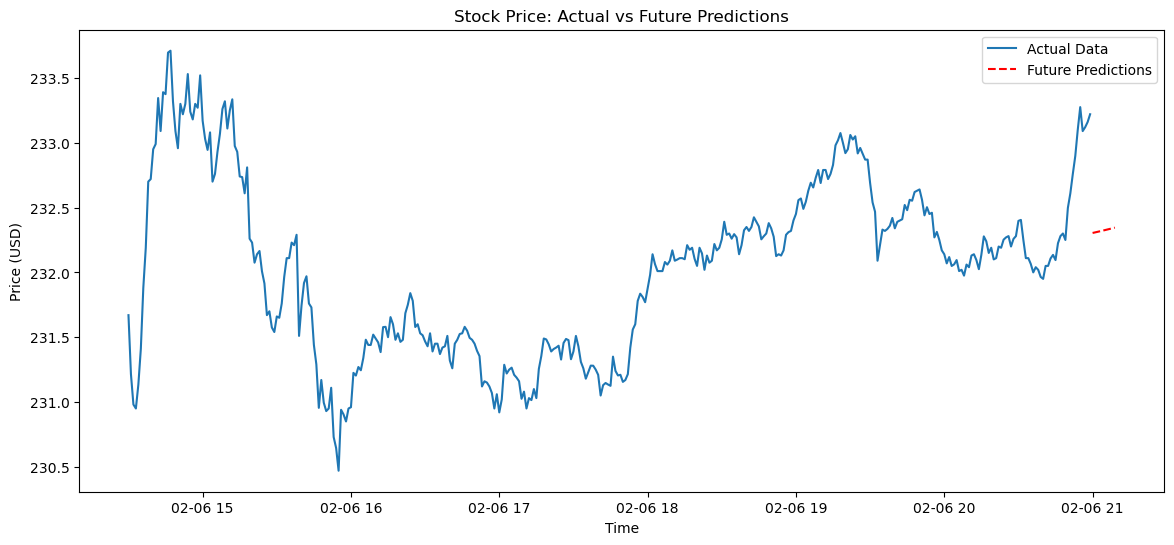

[*********************100%***********************]  1 of 1 completed


(378, 1)


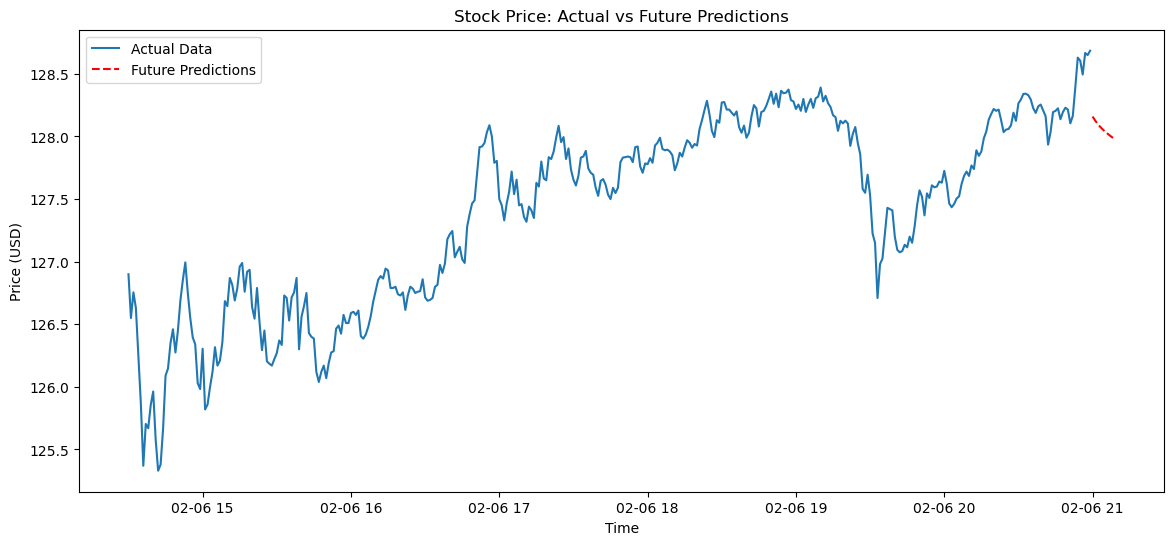

[*********************100%***********************]  1 of 1 completed


(378, 1)


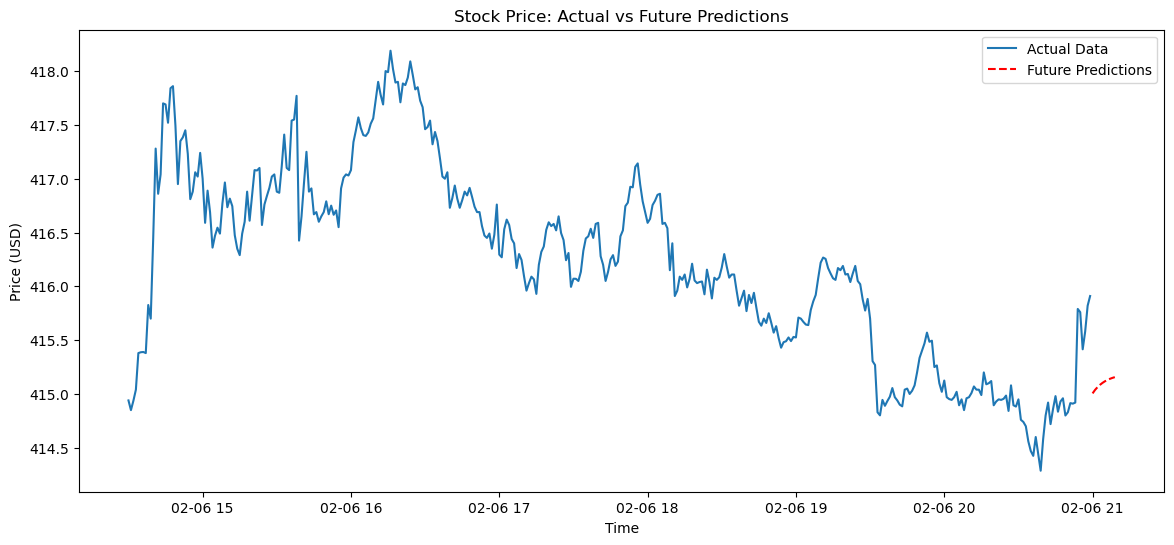

[*********************100%***********************]  1 of 1 completed


(378, 1)


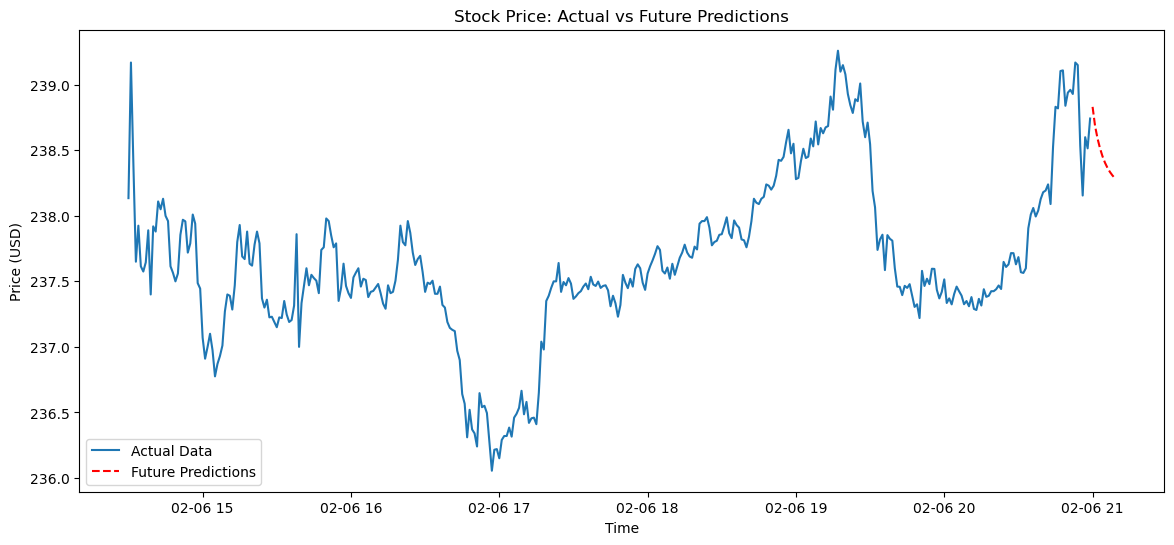

[*********************100%***********************]  1 of 1 completed


(378, 1)


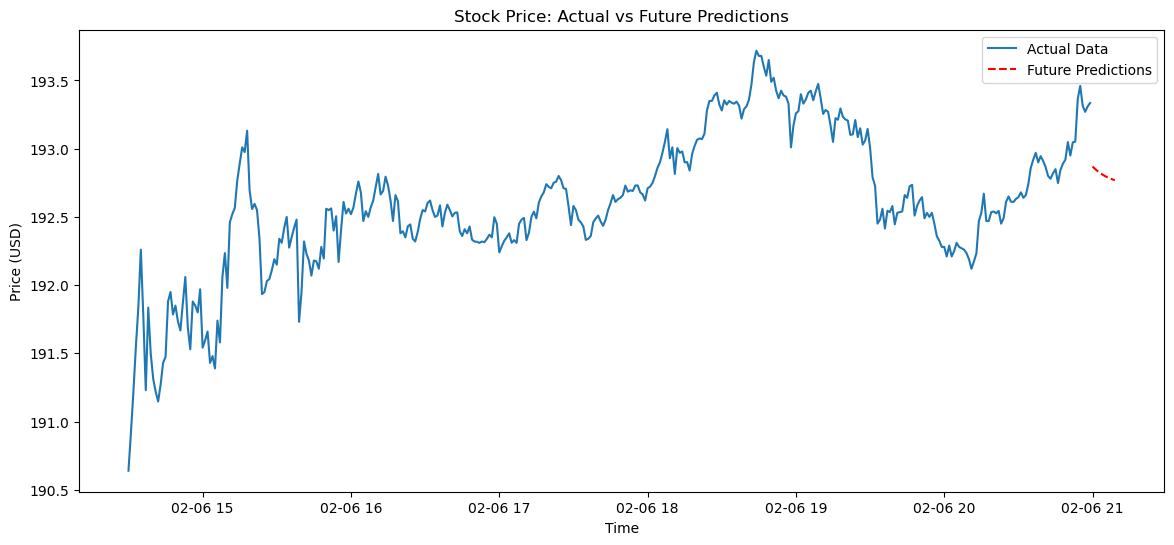

[*********************100%***********************]  1 of 1 completed


(378, 1)


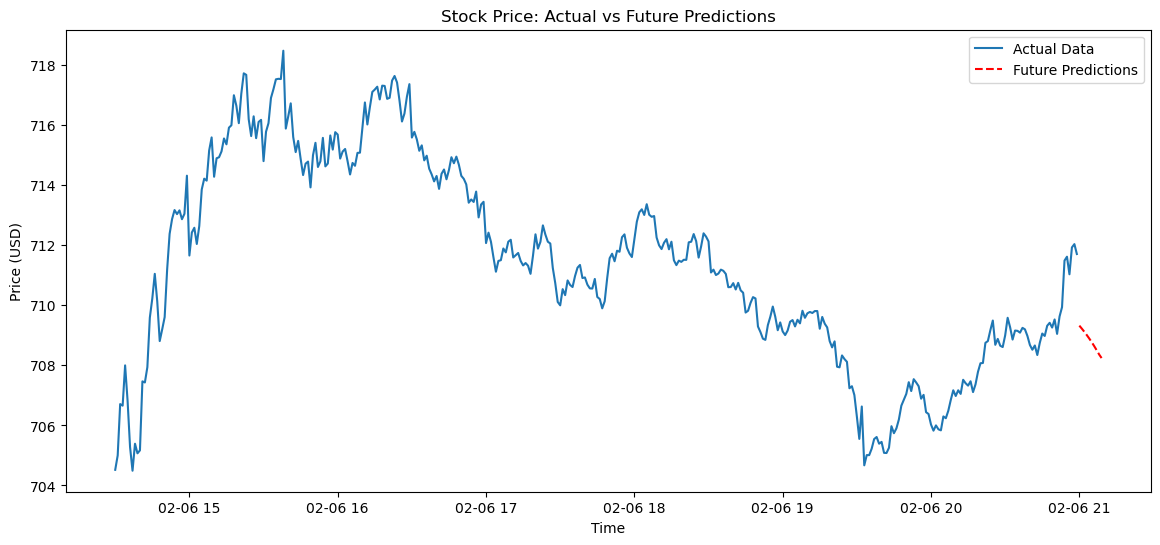

[*********************100%***********************]  1 of 1 completed


(378, 1)


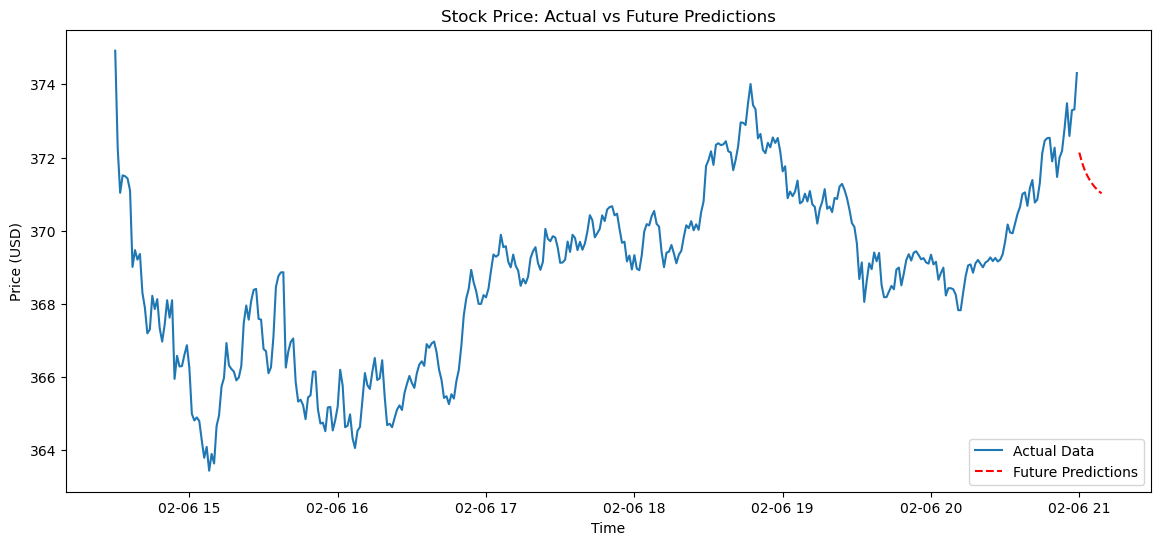

[*********************100%***********************]  1 of 1 completed


(378, 1)


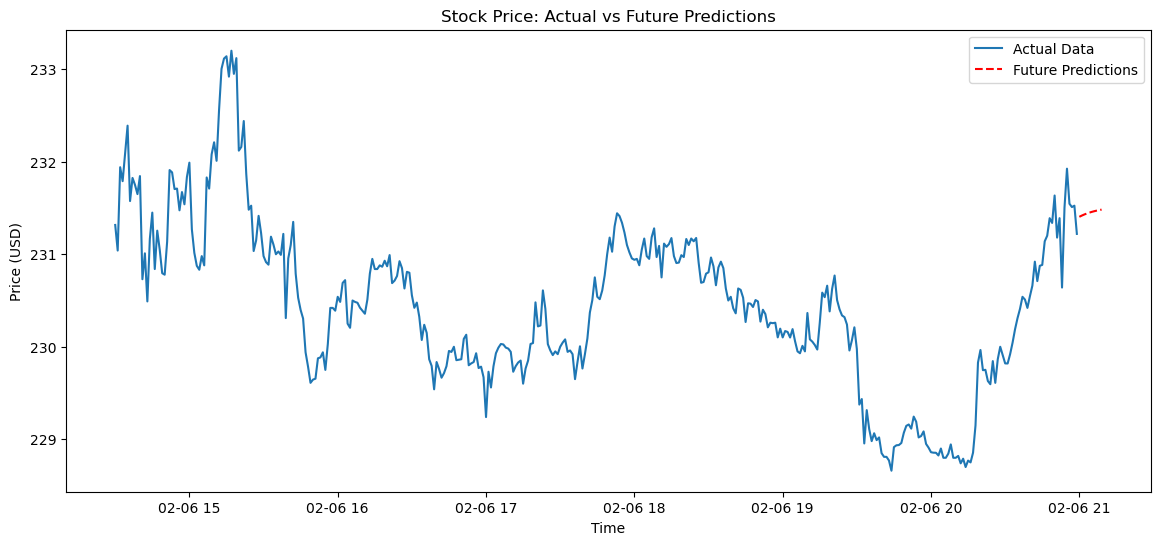

[*********************100%***********************]  1 of 1 completed


(377, 1)


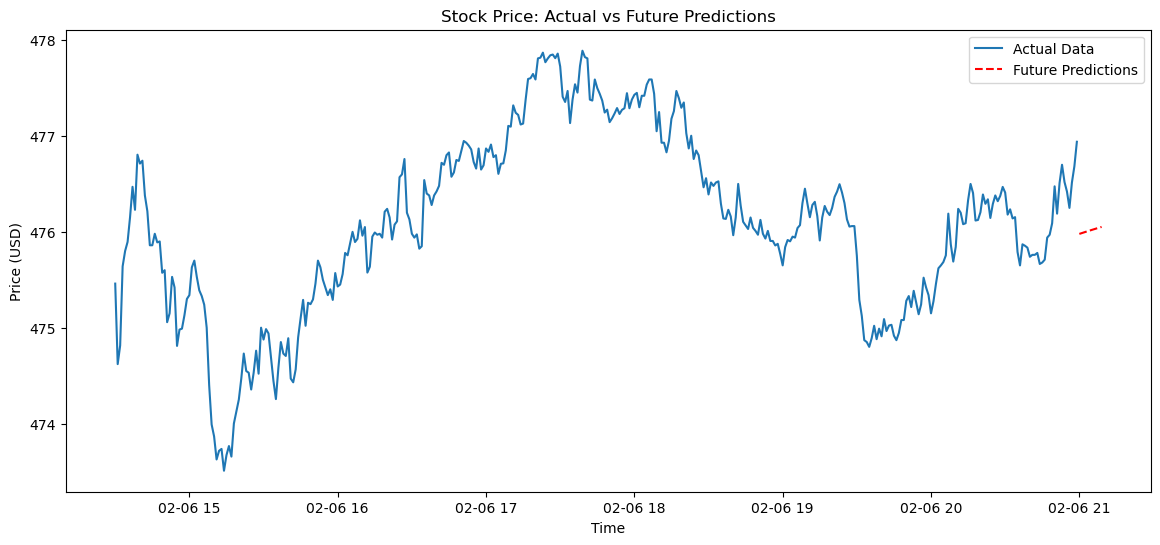

[*********************100%***********************]  1 of 1 completed


(378, 1)


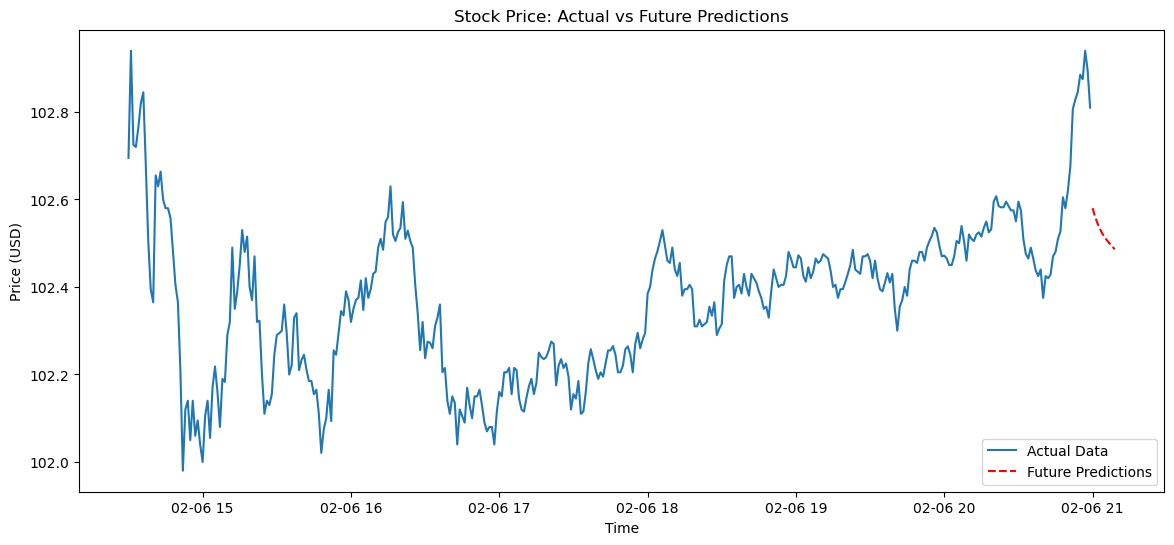

In [80]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# Ticker details
tickers = ["AAPL", "NVDA", "MSFT", "AMZN", "GOOG", "META", "TSLA", "AVGO", "BRK-B", "WMT"]
interval = "1m"
period = "1d"

results = []  # Store results for each ticker

def predict_future(model, last_data_point, scaler, n_predictions=10):
    # Use the last data point to start predicting the future
    predictions = []
    current_input = last_data_point

    for _ in range(n_predictions):
        
        # Predict the next value
        next_prediction = model.predict(np.array(current_input[-1]).reshape(-1, 1))
        predictions.append(next_prediction[0])
        
        # Update current input by appending the predicted value
        current_input = np.append(current_input[1:], next_prediction)
    
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

def plot_future_predictions(predictions, data, future_periods=10):
    # Create future dates (Assuming the last date is continuous)
    last_date = data.index[-1]
    future_dates = [last_date + np.timedelta64(i, 'm') for i in range(1, future_periods + 1)]
    
    # Plot the future predictions
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data["Close"], label="Actual Data")
    plt.plot(future_dates, predictions, label="Future Predictions", linestyle="--", color="red")
    plt.title("Stock Price: Actual vs Future Predictions")
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

def predict_stock(ticker):
    # Download stock data
    data = yf.download(tickers=ticker, period=period, interval=interval)

    # Extract and clean the closing prices
    closing_prices = data["Close"].dropna().values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(closing_prices)

    # Prepare training and testing data
    train_size = len(scaled_prices) - 10
    train, test = scaled_prices[:train_size], scaled_prices[train_size:]

    # Create input-output datasets
    def create_dataset(data):
        x, y = [], []
        for i in range(len(data) - 1):
            x.append(data[i][0])
            y.append(data[i + 1][0])
        return np.array(x), np.array(y)

    X_train, y_train = create_dataset(train)
    # X_test, y_test = create_dataset(test, time_step)
    X_train = np.array(X_train).reshape(-1, 1)
    print(X_train.shape)
    
    # Build the MLPRegressor model
    model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
    model.fit(X_train, y_train)
    predictions = predict_future(model, X_train, scaler, 10)
    plot_future_predictions(predictions, data, 10)

    # Make predictions
    # predictions = model.predict(X_test)
    # predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

    # Inverse transform actual test data
    # y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Record key values
    # last_train_price = closing_prices[train_size - 1][0]
    # last_predicted_price = predictions[-1][0]
    # last_actual_price = y_test_actual[-1][0]

    # results.append({
    #     "Ticker": ticker,
    #     "Last Train Price": last_train_price,
    #     "Predicted Price": last_predicted_price,
    #     "Actual Price": last_actual_price
    # })

    # Plot the results
    # plt.figure(figsize=(14, 6))
    # plt.plot(data.index[-len(y_test_actual):], y_test_actual, label="Actual Data")
    # plt.plot(data.index[-len(predictions):], predictions, label="Predicted Data", linestyle="--")
    # plt.title(f"{ticker} Stock Price: Actual vs Predicted (MLPRegressor)")
    # plt.xlabel("Time")
    # plt.ylabel("Price (USD)")
    # plt.legend()
    # plt.show()

# Generate plots and record results for each ticker
for tick in tickers:
    predict_stock(tick)

# Display results
# for result in results:
#     print(result)


In [ ]:
['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'JPM', 'V', 'PFE', 'KO', 'JNJ', 'DIS', 'BA', 'CAT', 'WMT', 'MCD', 'GE', 'CSCO', 'XOM', 'CVX', 'NKE', 'NFLX', 'UNH', 'PYPL', 'AMD', 'BA', 'IBM', 'INTC', 'GS', 'SPGI', 'T', 'VZ', 'AMGN', 'CVS', 'LMT', 'RTX', 'HD', 'LOW', 'UPS', 'MS', 'BK', 'AXP', 'BLK', 'MO', 'NEE', 'BMY', 'WFC', 'CSX', 'SCHW', 'ZTS', 'MTB', 'PGR', 'DHR', 'TMO', 'ABT', 'SYY', 'SYK', 'HUM', 'MRK', 'GILD', 'MMM', 'USB', 'MTCH', 'AIG', 'UAL']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from datetime import datetime, timedelta
from src.get_fin_info import get_s_p_tickers, get_fin_data
from src.lstm import get_train_test_for_lstm, build_model, predict_future

# Ticker details
tickers = get_s_p_tickers()
interval = "5m"
period = "1d"
start = (datetime.today() - timedelta(days=4)).strftime('%Y-%m-%d')
end = (datetime.today() - timedelta(days=3)).strftime('%Y-%m-%d')

results = []  # Store results for each ticker

def calc_difference(past, future):
    dif = future-past
    return dif
    if dif<0:
        return dif
    return f"+{dif}"

def predict_stock(ticker):
    # Get stock data
    closing_prices = get_fin_data(ticker, start, end, interval)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(closing_prices)

    X_train, y_train = get_train_test_for_lstm(scaled_prices)
    
    # Build the MLPRegressor model
    model = build_model(X_train, y_train)
    
    predictions = predict_future(model, y_train, scaler) # change y_tain to whole data set when real data

    # Record key values
    last_train_price = scaler.inverse_transform(np.array(X_train[-1][0]).reshape(-1, 1))[0][0]
    last_predicted_price = predictions[-1][0]
    last_actual_price = scaler.inverse_transform(np.array(scaled_prices[-1][0]).reshape(-1, 1))[0][0]

    results.append({
        "Ticker": ticker,
        # "Last Train Price": last_train_price,
        # "Predicted Price": last_predicted_price,
        # "Actual Price": last_actual_price,
        "Predicted Difference": calc_difference(last_train_price, last_predicted_price),
        "Actual Difference": calc_difference(last_train_price, last_actual_price)

    })

# Generate plots and record results for each ticker
for tick in tickers:
    predict_stock(tick)

# Create DataFrame
df = pd.DataFrame(results)

# Round to 2 decimal places
# df["Last Train Price"] = df["Last Train Price"].round(2)
# df["Predicted Price"] = df["Predicted Price"].round(2)
# df["Actual Price"] = df["Actual Price"].round(2)

# Display the table
print(df)


[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[*********************100%***********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

    Ticker  Predicted Difference  Actual Difference
0      MMM             -0.130188          -0.134995
1      AOS             -0.032561          -0.239998
2      ABT             -0.036360           0.220001
3     ABBV              0.469180           0.230011
4      ACN              1.174814           2.289978
..     ...                   ...                ...
496    XYL              0.337545          -0.834991
497    YUM             -0.209037          -0.139999
498   ZBRA              1.119084           0.230011
499    ZBH              0.216751          -0.160004
500    ZTS              0.039236           0.259995

[501 rows x 3 columns]



c:\Users\olive\anaconda3\envs\algo_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


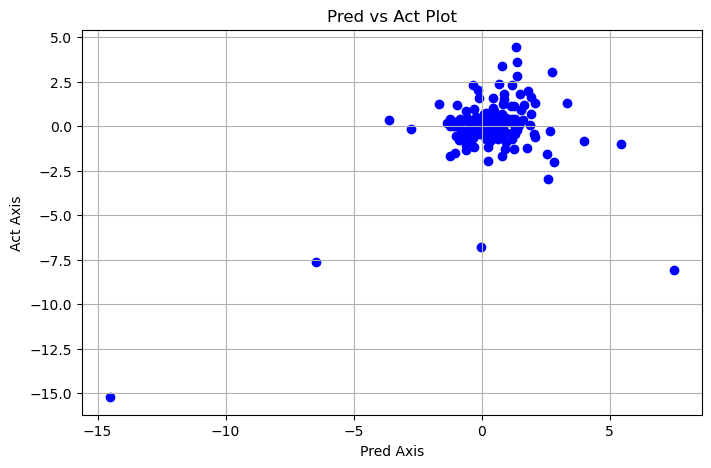

In [2]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Predicted Difference'], df['Actual Difference'], marker='o', linestyle='-', color='blue')
plt.title('Pred vs Act Plot')
plt.xlabel('Pred Axis')
plt.ylabel('Act Axis')
plt.grid(True)
plt.show()

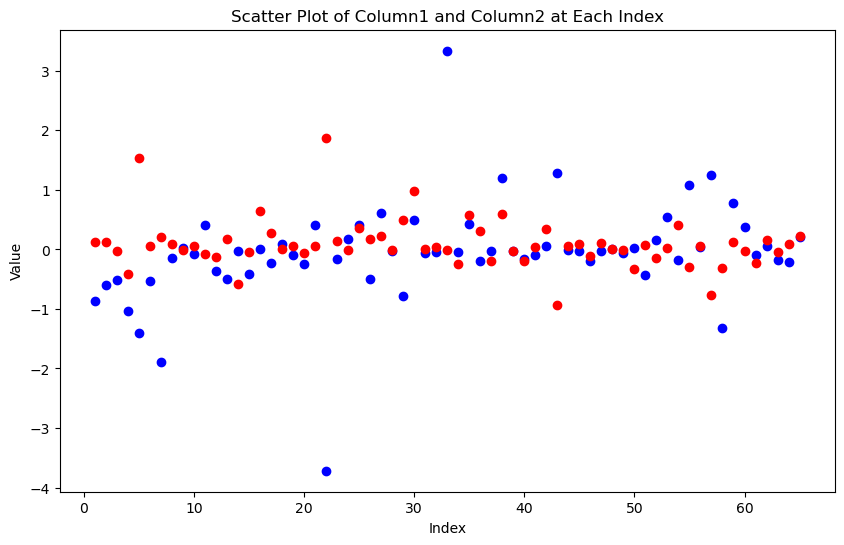

In [101]:
plt.figure(figsize=(10, 6))

# Plot each pair of values from both columns for the same x-axis index
for i in range(len(df)):
    plt.scatter(i + 1, df['Predicted Difference'][i], color='blue')  # Plot for Column1
    plt.scatter(i + 1, df['Actual Difference'][i], color='red')   # Plot for Column2

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Column1 and Column2 at Each Index')
plt.show()

In [ ]:
def predict_future(model, last_data_point, scaler, n_predictions=1):
    # Use the last data point to start predicting the future
    predictions = []
    current_input = last_data_point

    for _ in range(n_predictions):
        
        # Predict the next value
        next_prediction = model.predict(np.array(current_input[-1]).reshape(-1, 1))
        predictions.append(next_prediction[0])
        
        # Update current input by appending the predicted value
        current_input = np.append(current_input[1:], next_prediction)
    
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

def plot_future_predictions(predictions, data, future_periods=1):
    # Create future dates (Assuming the last date is continuous)
    last_date = data.index[-1]
    future_dates = [last_date + np.timedelta64(i, 'm') for i in range(1, future_periods + 1)]
    
    # Plot the future predictions
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data["Close"], label="Actual Data")
    plt.plot(future_dates, predictions, label="Future Predictions", linestyle="--", color="red")
    plt.title("Stock Price: Actual vs Future Predictions")
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

In [102]:

# Initialize counters
both_above_0 = 0
both_below_0 = 0
one_above_one_below = 0

# Loop through each row and count the conditions
for i in range(len(df)):
    col1 = df['Predicted Difference'][i]
    col2 = df['Actual Difference'][i]

    if col1 > 0 and col2 > 0:
        both_above_0 += 1
    elif col1 < 0 and col2 < 0:
        both_below_0 += 1
    elif (col1 > 0 and col2 < 0) or (col1 < 0 and col2 > 0):
        one_above_one_below += 1

# Print the results
print(f"Both dots are above 0: {both_above_0} times")
print(f"Both dots are below 0: {both_below_0} times")
print(f"One dot is above 0 while the other is below 0: {one_above_one_below} times")

Both dots are above 0: 15 times
Both dots are below 0: 16 times
One dot is above 0 while the other is below 0: 34 times


In [99]:
14+9+42

65

In [7]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from datetime import datetime, timedelta
from src.get_fin_info import get_s_p_tickers, get_fin_data
from src.lstm import get_train_test_for_lstm

# Ticker details
tickers = get_s_p_tickers()
interval = "5m"
period = "1d"
start = (datetime.today() - timedelta(days=4)).strftime('%Y-%m-%d')
end = (datetime.today() - timedelta(days=3)).strftime('%Y-%m-%d')

closing_prices = get_fin_data("aapl", start, end, interval)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

print(scaled_prices)
train_size = len(scaled_prices) - 1
train = scaled_prices[:train_size]

[*********************100%***********************]  1 of 1 completed

[[0.        ]
 [0.19374542]
 [0.15499685]
 [0.23586421]
 [0.28472088]
 [0.32549262]
 [0.3420044 ]
 [0.46499055]
 [0.4397203 ]
 [0.4397203 ]
 [0.4902608 ]
 [0.56944434]
 [0.62672785]
 [0.67053047]
 [0.73285004]
 [0.73286546]
 [0.66385943]
 [0.59471716]
 [0.59892801]
 [0.64357382]
 [0.55269862]
 [0.61156313]
 [0.57534159]
 [0.68400879]
 [0.73455186]
 [0.8294194 ]
 [0.90809651]
 [0.83900564]
 [0.83765858]
 [0.87608581]
 [0.90555406]
 [0.92492706]
 [0.96451882]
 [0.86259206]
 [0.86259206]
 [0.80699495]
 [0.81056569]
 [0.81457602]
 [0.88365146]
 [0.83361483]
 [0.86343526]
 [0.88533529]
 [0.85418579]
 [0.85079757]
 [0.81541922]
 [0.81794625]
 [0.83224977]
 [0.88112444]
 [0.84574352]
 [0.8010977 ]
 [0.81036517]
 [0.83900564]
 [0.8221571 ]
 [0.75813828]
 [0.81626242]
 [0.8322652 ]
 [0.84658672]
 [0.86596229]
 [0.87467191]
 [0.86764611]
 [0.90304246]
 [0.91650278]
 [0.94598645]
 [0.9636782 ]
 [0.93148241]
 [0.93503515]
 [0.96030797]
 [0.9426188 ]
 [1.        ]
 [0.9518837 ]
 [0.9097829 ]
 [0.89

In [11]:
np.array(data).reshape(-1,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
data = [0,1,2,3,4,5,6,7,8,9,10]
def create_dataset(data):
    x, y = [], []
    for i in range(len(data) - 1):
        x.append(data[i][0])
        y.append(data[i + 1][0])
    return np.array(x), np.array(y)
x, y = create_dataset(np.array(data).reshape(-1,1))
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


In [6]:
data[:-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

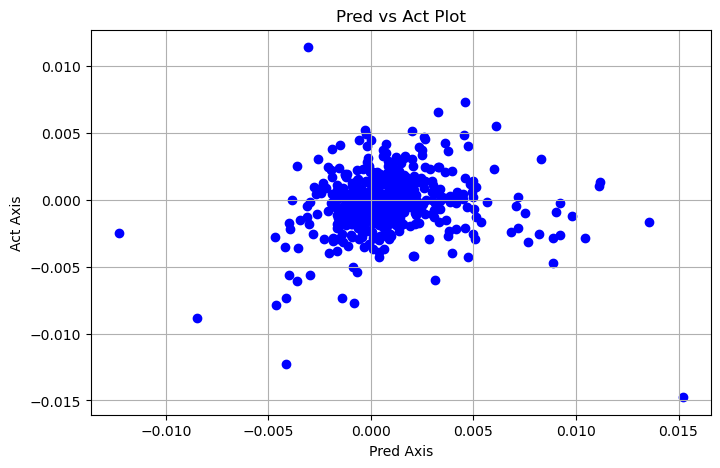

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

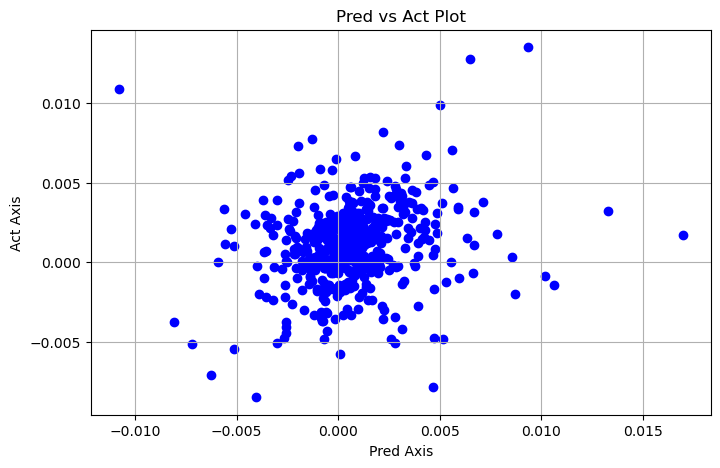

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MMM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from datetime import datetime, timedelta
from src.get_fin_info import get_s_p_tickers, get_fin_data
from src.lstm import get_train_test_for_lstm, build_model, predict_future
from src.testing import calc_difference, plot_skatter

# Ticker details
tickers = get_s_p_tickers()

def predict_stock(ticker, start, end, interval):
    # Get stock data
    closing_prices = get_fin_data(ticker, start, end, interval)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(closing_prices)

    X_train, y_train = get_train_test_for_lstm(scaled_prices)
    
    # Build the MLPRegressor model
    model = build_model(X_train, y_train.ravel())
    
    predictions = predict_future(model, y_train, scaler) # change y_tain to whole data set when real data

    # Record key values
    last_train_price = scaler.inverse_transform(np.array(X_train[-1][0]).reshape(-1, 1))[0][0]
    last_predicted_price = predictions[-1][0]
    last_actual_price = scaler.inverse_transform(np.array(scaled_prices[-1][0]).reshape(-1, 1))[0][0]
    return last_train_price, last_predicted_price, last_actual_price

ave_act_dif = []
profits_005 = []
profits_01 = []
profits_015 = []
for i in range(30):
    results = []
    act_dif = []
    interval = "5m"
    start = (datetime.today() - timedelta(days=i+1)).strftime('%Y-%m-%d')
    end = (datetime.today() - timedelta(days=i)).strftime('%Y-%m-%d')

    try:
        # Generate plots and record results for each ticker
        for ticker in tickers:
            last_train_price, last_predicted_price, last_actual_price = predict_stock(ticker, start, end, interval)

            predicted_difference = calc_difference(last_train_price, last_predicted_price)
            actual_difference = calc_difference(last_train_price, last_actual_price)
            act_dif.append(actual_difference)

            if predicted_difference>0.005:
                print(i, last_train_price, last_predicted_price, last_actual_price)

                profits_005.append((i, last_train_price, last_predicted_price, last_actual_price))

                if predicted_difference>0.01:
                    print(i, last_train_price, last_predicted_price, last_actual_price)

                    profits_01.append((i, last_train_price, last_predicted_price, last_actual_price))

                    if predicted_difference>0.015:
                        print(i, last_train_price, last_predicted_price, last_actual_price)

                        profits_015.append((i, last_train_price, last_predicted_price, last_actual_price))

            results.append({
                "Ticker": ticker,
                "Predicted Difference": predicted_difference,
                "Actual Difference": actual_difference

            })
        # Create DataFrame
        df = pd.DataFrame(results)
        plot_skatter(df)

    except Exception as e:
        print(e)
    if len(act_dif)>0:
        ave_act_dif.append((i, sum(act_dif)/len(act_dif)))

In [3]:
print(ave_act_dif)
print(profits_1)
print(profits_2_5)
print(profits_5)

[(0, np.float64(-0.00023576516004363154)), (1, np.float64(0.0010539286326363172)), (2, np.float64(0.0009751879216264412))]
[]
[]
[]


In [5]:
print(ave_act_dif)
print(profits_1)
print(profits_2_5)
print(profits_5)

[(0, np.float64(-0.12535249401709203)), (1, np.float64(0.24268085418822904)), (2, np.float64(0.2067307892911671)), (3, np.float64(-0.05819516933844687)), (4, np.float64(-0.18680103754593022))]
[(0, np.float64(306.67999267578125), np.float64(307.8511830996391), np.float64(305.9700012207031)), (0, np.float64(3420.080078125), np.float64(3423.7830169256113), np.float64(3426.469970703125)), (0, np.float64(170.0500030517578), np.float64(171.94993623561243), np.float64(170.27000427246094)), (0, np.float64(202.25999450683594), np.float64(203.2779521537033), np.float64(202.1199951171875)), (0, np.float64(1044.405029296875), np.float64(1046.0669482802543), np.float64(1043.4599609375)), (0, np.float64(158.10000610351562), np.float64(159.23385125853042), np.float64(158.1300048828125)), (0, np.float64(313.20001220703125), np.float64(315.4165599147136), np.float64(313.04998779296875)), (0, np.float64(930.0349731445312), np.float64(933.4112504382516), np.float64(933.989990234375)), (0, np.float64(292

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from src.get_fin_info import get_s_p_tickers
from src.testing import calc_difference, plot_skatter, breached_threshold
from src.prediction import predict_stock

# Ticker details
tickers = get_s_p_tickers()

ave_act_dif = []
profits_005 = []
profits_01 = []
profits_015 = []
for i in range(3):
    results = []
    act_dif = []
    interval = "5m"
    start = (datetime.today() - timedelta(days=i+1)).strftime('%Y-%m-%d')
    end = (datetime.today() - timedelta(days=i)).strftime('%Y-%m-%d')

    try:
        # Generate plots and record results for each ticker
        for ticker in tickers:
            last_train_price, last_predicted_price, last_actual_price = predict_stock(ticker, start, end, interval)

            predicted_difference = calc_difference(last_train_price, last_predicted_price)
            actual_difference = calc_difference(last_train_price, last_actual_price)
            act_dif.append(actual_difference)

            breached_threshold(0.005, profits_005, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)
            breached_threshold(0.01, profits_01, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)
            breached_threshold(0.015, profits_015, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)

            results.append({
                "Ticker": ticker,
                "Predicted Difference": predicted_difference,
                "Actual Difference": actual_difference
            })

        df = pd.DataFrame(results)
        plot_skatter(df)

    except Exception as e:
        print(e)
    if len(act_dif)>0:
        ave_act_dif.append((i, sum(act_dif)/len(act_dif)))

0.5